# The Complete Effects of Coors Field

## Outline

- Check Coors Effect
    - Altitude at Coors vs. other stadiums
    - Offense numbers at Coors vs. other stadiums
        - AVG, ISO, K%, BB%, RA
        - Coors vs. All Other Parks (AOP)
    - Statcast offense numbers at Coors vs. other stadiums (is EV different? is distance to EV different?)
        - xwOBA / wOBA at every park
        - Avg hit distance by LA/EV for AOP
        - Gap in hit distance by LA/EV for Coors vs. AOP
        - Distribution in LA for Coors vs. AOP
        - Distribution in EV for Coors vs. AOP
    - 1993-2001 (pre-humidor) vs. 2002-2024 (post-humidor)
    - Park factors from FanGraphs
- Check Coors Hangover Effect
- Additional effects
    - Fielding errors
    - Strike % for pitchers
    - Pitch movement
    - Effect over time
        - Across season
        - Over multiple seasons
        - Check players changing teams
        - Temperature impact
- Redo WAR estimates for notable Rockies
- Check which pitchers/batters should perform better and do perform better at Coors


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import requests
#import time
from matplotlib import colors
import seaborn as sns
from pybaseball import team_batting, statcast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.width = 0
pd.options.display.max_colwidth = 200
import warnings
warnings.filterwarnings(action='ignore')

## Coors Effect

### Park Altitudes

    [Code/visual]

### Offensive Stats at Coors

In [ ]:
df = statcast('2024-01-01', '2024-12-31')

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|██████████| 246/246 [09:53<00:00,  2.41s/it]


In [32]:
df['bahb_value'] = df['babip_value']
df.loc[df['events'] == 'home_run', 'bahb_value'] = 1

col_df = df[(df['home_team'] == 'COL') & (df['events'].notna()) & (df['events'] != 'truncated_pa') & (df['estimated_woba_using_speedangle'] != '<NA>')]
mlb_df = df[(df['home_team'] != 'COL') & (df['events'].notna()) & (df['events'] != 'truncated_pa') & (df['estimated_woba_using_speedangle'] != '<NA>')]

In [7]:
metrics = ['BABIP', 'HR%', 'ISO', 'K%', 'BB%', 'R/PA']
col_metrics = ["{:.3}".format(col_df[(col_df['description'] == 'hit_into_play') & (col_df['events'] != 'home_run')]['babip_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(col_df[col_df['events'] == 'home_run']) / len(col_df)),
               "{:.3}".format(col_df[col_df['description'] == 'hit_into_play']['iso_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(col_df[col_df['events'] == 'strikeout']) / len(col_df)),
               "{:.1%}".format(len(col_df[col_df['events'] == 'walk']) / len(col_df)),
               "{:.3}".format(col_df[col_df['description'] == 'hit_into_play']['post_bat_score'].mean() - col_df[col_df['description'] == 'hit_into_play']['bat_score'].mean()).lstrip('0')]
mlb_metrics = ["{:.3}".format(mlb_df[(mlb_df['description'] == 'hit_into_play') & (mlb_df['events'] != 'home_run')]['babip_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(mlb_df[mlb_df['events'] == 'home_run']) / len(mlb_df)),
               "{:.3}".format(mlb_df[mlb_df['description'] == 'hit_into_play']['iso_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(mlb_df[mlb_df['events'] == 'strikeout']) / len(mlb_df)),
               "{:.1%}".format(len(mlb_df[mlb_df['events'] == 'walk']) / len(mlb_df)),
               "{:.3}".format(mlb_df[mlb_df['description'] == 'hit_into_play']['post_bat_score'].mean() - mlb_df[mlb_df['description'] == 'hit_into_play']['bat_score'].mean()).lstrip('0')]

off_table = pd.DataFrame()
off_table[''] = metrics
off_table['Coors'] = col_metrics
off_table['All Other Parks'] = mlb_metrics

print(off_table.to_string(index=False))

      Coors All Other Parks
BABIP   .33            .289
  HR%  3.3%            3.0%
  ISO  .229            .206
   K% 21.0%           22.7%
  BB%  8.2%            8.0%
 R/PA  .194            .165


In [10]:
col_df_away = col_df[col_df['inning_topbot'] == 'Top']
mlb_df_away = mlb_df[mlb_df['inning_topbot'] == 'Top']

col_metrics_away = ["{:.3}".format(col_df_away[(col_df_away['description'] == 'hit_into_play') & (col_df_away['events'] != 'home_run')]['babip_value'].mean()).lstrip('0'),
                    "{:.1%}".format(len(col_df_away[col_df_away['events'] == 'home_run']) / len(col_df_away)),
                    "{:.3}".format(col_df_away[col_df_away['description'] == 'hit_into_play']['iso_value'].mean()).lstrip('0'),
                    "{:.1%}".format(len(col_df_away[col_df_away['events'] == 'strikeout']) / len(col_df_away)),
                    "{:.1%}".format(len(col_df_away[col_df_away['events'] == 'walk']) / len(col_df_away)),
                    "{:.3}".format(col_df_away[col_df_away['description'] == 'hit_into_play']['post_bat_score'].mean() - col_df_away[col_df_away['description'] == 'hit_into_play']['bat_score'].mean()).lstrip('0')]
mlb_metrics_away = ["{:.3}".format(mlb_df_away[(mlb_df_away['description'] == 'hit_into_play') & (mlb_df_away['events'] != 'home_run')]['babip_value'].mean()).lstrip('0'),
                    "{:.1%}".format(len(mlb_df_away[mlb_df_away['events'] == 'home_run']) / len(mlb_df_away)),
                    "{:.3}".format(mlb_df_away[mlb_df_away['description'] == 'hit_into_play']['iso_value'].mean()).lstrip('0'),
                    "{:.1%}".format(len(mlb_df_away[mlb_df_away['events'] == 'strikeout']) / len(mlb_df_away)),
                    "{:.1%}".format(len(mlb_df_away[mlb_df_away['events'] == 'walk']) / len(mlb_df_away)),
                    "{:.3}".format(mlb_df_away[mlb_df_away['description'] == 'hit_into_play']['post_bat_score'].mean() - mlb_df_away[mlb_df_away['description'] == 'hit_into_play']['bat_score'].mean()).lstrip('0')]

off_table = pd.DataFrame()
off_table[''] = metrics
off_table['Coors'] = col_metrics_away
off_table['All Other Parks'] = mlb_metrics_away

print(off_table.to_string(index=False))

      Coors All Other Parks
BABIP  .328             .29
  HR%  3.4%            2.9%
  ISO  .225            .201
   K% 17.4%           23.3%
  BB%  8.5%            7.7%
 R/PA  .195            .162


In [11]:
col_df_col = col_df[col_df['inning_topbot'] == 'Bot']
mlb_df_col = mlb_df[(mlb_df['away_team'] == 'COL') & (mlb_df['inning_topbot'] == 'Top')]
home_metrics = ["{:.3}".format(col_df_col[(col_df_col['description'] == 'hit_into_play') & (col_df_col['events'] != 'home_run')]['babip_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(col_df_col[col_df_col['events'] == 'home_run']) / len(col_df_col)),
               "{:.3}".format(col_df_col[col_df_col['description'] == 'hit_into_play']['iso_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(col_df_col[col_df_col['events'] == 'strikeout']) / len(col_df_col)),
               "{:.1%}".format(len(col_df_col[col_df_col['events'] == 'walk']) / len(col_df_col)),
               "{:.3}".format(col_df_col[col_df_col['description'] == 'hit_into_play']['post_bat_score'].mean() - col_df_col[col_df_col['description'] == 'hit_into_play']['bat_score'].mean()).lstrip('0')]
away_metrics = ["{:.3}".format(mlb_df_col[(mlb_df_col['description'] == 'hit_into_play') & (mlb_df_col['events'] != 'home_run')]['babip_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(mlb_df_col[(mlb_df_col['events'] == 'home_run')]) / len(mlb_df_col[(mlb_df_col['away_team'] == 'COL')])),
               "{:.3}".format(mlb_df_col[(mlb_df_col['description'] == 'hit_into_play')]['iso_value'].mean()).lstrip('0'),
               "{:.1%}".format(len(mlb_df_col[(mlb_df_col['events'] == 'strikeout')]) / len(mlb_df_col[(mlb_df_col['away_team'] == 'COL')])),
               "{:.1%}".format(len(mlb_df_col[(mlb_df_col['events'] == 'walk')]) / len(mlb_df_col[(mlb_df_col['away_team'] == 'COL')])),
               "{:.3}".format(mlb_df_col[(mlb_df_col['description'] == 'hit_into_play')]['post_bat_score'].mean() - mlb_df_col[(mlb_df_col['away_team'] == 'COL') & (mlb_df_col['description'] == 'hit_into_play')]['bat_score'].mean()).lstrip('0')]

off_table = pd.DataFrame()
off_table[''] = metrics
off_table['Home'] = home_metrics
off_table['Away'] = away_metrics

print(off_table.to_string(index=False))

       Home  Away
BABIP  .333  .282
  HR%  3.2%  2.8%
  ISO  .234  .213
   K% 25.0% 29.2%
  BB%  8.0%  6.5%
 R/PA  .194   .15


### Statcast Metrics at Coors

In [33]:
#col_df = df[(df.home_team == 'COL') & (df['description'] == 'hit_into_play') & (df['estimated_woba_using_speedangle'] != '<NA>')]
#col_df.head()
metrics = ['xwOBA', 'wOBA']
col_df_ip = col_df[col_df['description'] == 'hit_into_play']
col_statcast = ["{:.3}".format(col_df_ip['estimated_woba_using_speedangle'].mean()).lstrip('0'),
                "{:.3}".format(col_df_ip['woba_value'].mean()).lstrip('0')]#,
                #"{:.3}".format(col_df_ip['woba_value'].mean() - col_df_ip['estimated_woba_using_speedangle'].mean()).lstrip('0')]
#print(col_df_ip['estimated_woba_using_speedangle'].mean())
#print(col_df_ip['woba_value'].mean())
mlb_df_ip = mlb_df[mlb_df['description'] == 'hit_into_play']
mlb_statcast = ["{:.3}".format(mlb_df_ip['estimated_woba_using_speedangle'].mean()).lstrip('0'),
                "{:.3}".format(mlb_df_ip['woba_value'].mean()).lstrip('0')]#,
                #"{:.3}".format(mlb_df_ip['woba_value'].mean() - mlb_df_ip['estimated_woba_using_speedangle'].mean()).lstrip('0')]
#print(mlb_df_ip['estimated_woba_using_speedangle'].mean())
#print(mlb_df_ip['woba_value'].mean())

woba_table = pd.DataFrame()
woba_table[''] = metrics
woba_table['Coors'] = col_statcast
woba_table['All Other Parks'] = mlb_statcast

print(woba_table.to_string(index=False))

      Coors All Other Parks
xwOBA  .375            .366
 wOBA  .417            .374


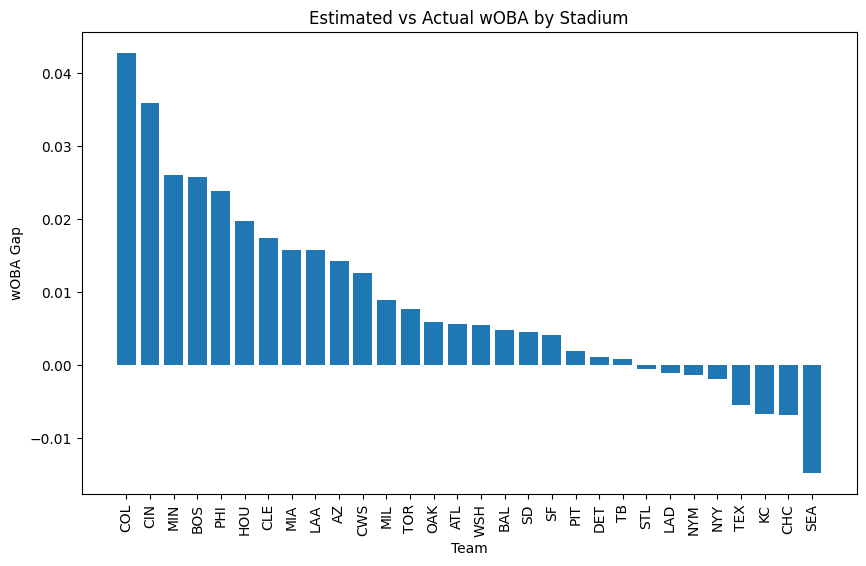

In [15]:
tot_df_ip = df[(df['description'] == 'hit_into_play') & (df['events'].notna()) & (df['events'] != 'truncated_pa') & (df['estimated_woba_using_speedangle'] != '<NA>')]
tot_df_ip['wOBA Gap'] = tot_df_ip['woba_value'] - tot_df_ip['estimated_woba_using_speedangle']
team_gaps = tot_df_ip.groupby('home_team')['wOBA Gap'].mean()
team_gaps = team_gaps.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(team_gaps.index, team_gaps.values)
plt.title('Estimated vs Actual wOBA by Stadium')
plt.xlabel('Team')
plt.ylabel('wOBA Gap')
plt.xticks(rotation=90)
plt.show()

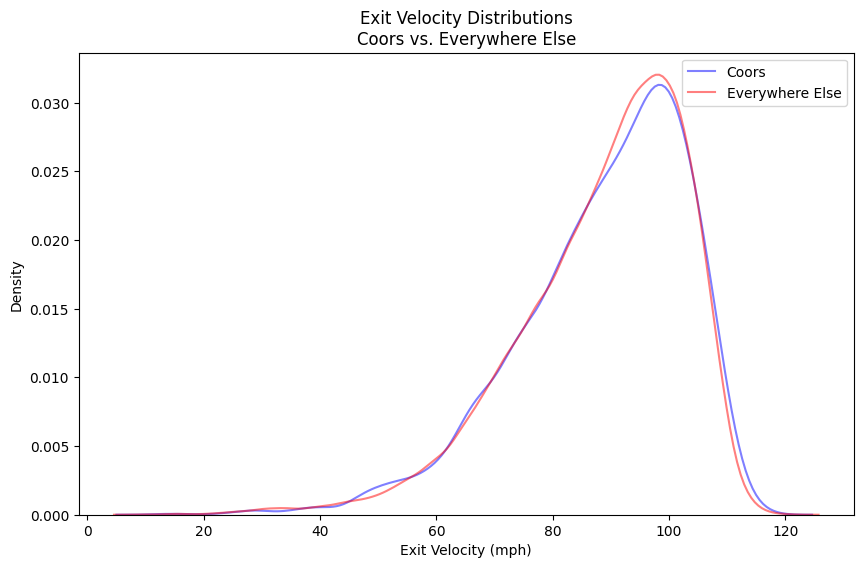

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(col_df_ip['launch_speed'], color='blue', label='Coors', alpha=0.5)
sns.kdeplot(mlb_df_ip['launch_speed'], color='red', label='Everywhere Else', alpha=0.5)
plt.title('Exit Velocity Distributions\nCoors vs. Everywhere Else')
plt.xlabel('Exit Velocity (mph)')
plt.legend()
plt.show()

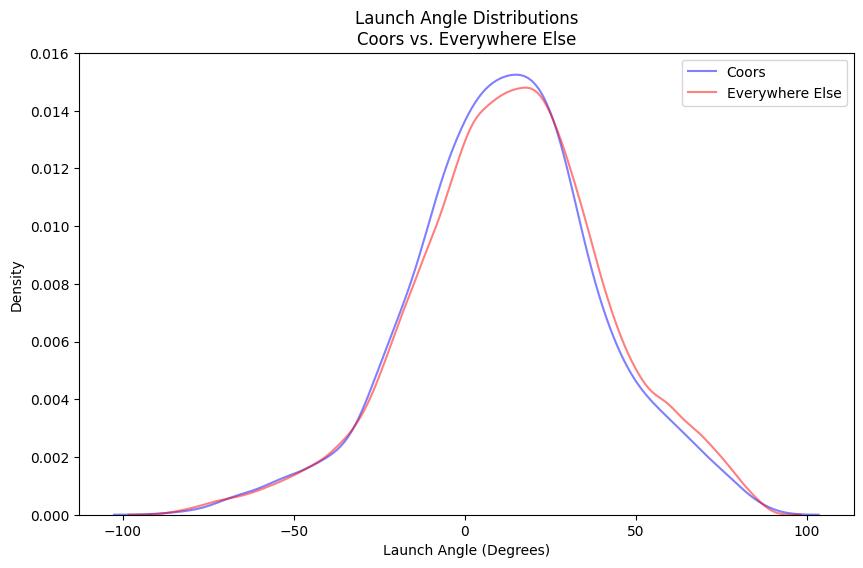

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(col_df_ip['launch_angle'], color='blue', label='Coors', alpha=0.5)
sns.kdeplot(mlb_df_ip['launch_angle'], color='red', label='Everywhere Else', alpha=0.5)
plt.title('Launch Angle Distributions\nCoors vs. Everywhere Else')
plt.xlabel('Launch Angle (Degrees)')
plt.legend()
plt.show()

In [34]:
step = 5
min_count = 10

col_df_ip['ev_bucket'] = np.floor(col_df_ip['launch_speed'] / step) * step
col_df_ip['la_bucket'] = np.floor(col_df_ip['launch_angle'] / step) * step
col_statcast_full = col_df_ip.groupby(['ev_bucket', 'la_bucket']).agg(
    dist_col=('hit_distance_sc', 'mean'),
    count_col=('hit_distance_sc', 'count'),
    babip_col=('babip_value', 'mean'),
    bahb_col=('bahb_value', 'mean'),
    iso_col=('iso_value', 'mean'),
    woba_col=('woba_value', 'mean'),
    xwoba_col=('estimated_woba_using_speedangle', 'mean')
).reset_index()

mlb_df_ip['ev_bucket'] = np.floor(mlb_df_ip['launch_speed'] / step) * step
mlb_df_ip['la_bucket'] = np.floor(mlb_df_ip['launch_angle'] / step) * step
mlb_statcast_full = mlb_df_ip.groupby(['ev_bucket', 'la_bucket']).agg(
    dist_mlb=('hit_distance_sc', 'mean'),
    count_mlb=('hit_distance_sc', 'count'),
    babip_mlb=('babip_value', 'mean'),
    bahb_mlb=('bahb_value', 'mean'),
    iso_mlb=('iso_value', 'mean'),
    woba_mlb=('woba_value', 'mean'),
    xwoba_mlb=('estimated_woba_using_speedangle', 'mean')
).reset_index()

statcast = pd.merge(col_statcast_full, mlb_statcast_full, on=['ev_bucket', 'la_bucket'], how='inner')
statcast['distance_gap'] = statcast['dist_col'] - statcast['dist_mlb']
statcast['distance_gap_perc'] = statcast['distance_gap'] / statcast['dist_mlb'] * 100
statcast['babip_gap'] = statcast['babip_col'] - statcast['babip_mlb']
statcast['bahb_gap'] = statcast['bahb_col'] - statcast['bahb_mlb']
statcast['iso_gap'] = statcast['iso_col'] - statcast['iso_mlb']
statcast['woba_gap'] = statcast['woba_col'] - statcast['woba_mlb']
statcast['xwoba_gap'] = statcast['xwoba_col'] - statcast['xwoba_mlb']
statcast['ev_bucket'] = statcast['ev_bucket'].astype(int)
statcast['la_bucket'] = statcast['la_bucket'].astype(int)

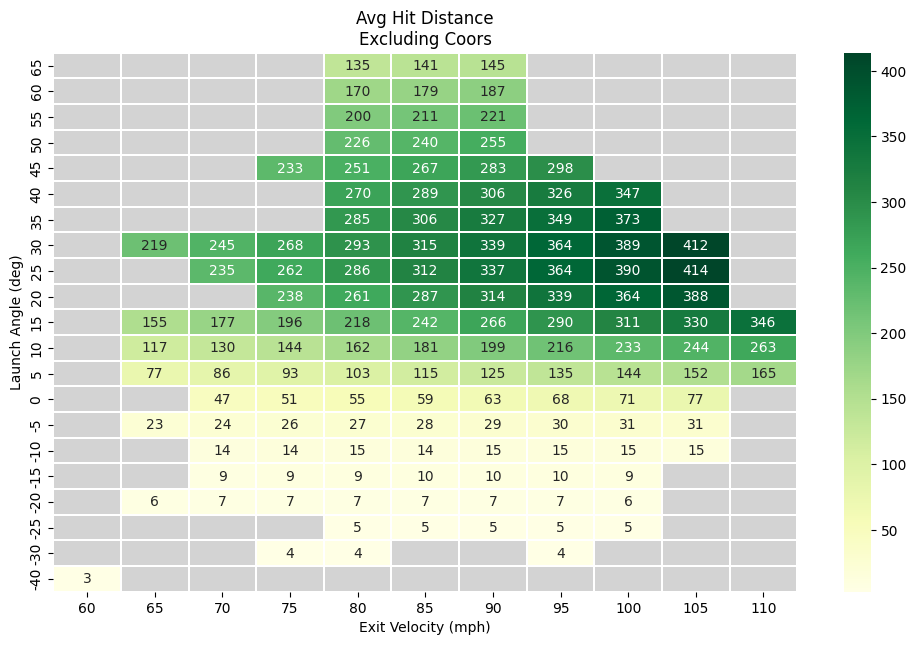

In [35]:
dist_pivot = statcast[statcast['count_col'] >= min_count].pivot(index='la_bucket', columns='ev_bucket', values='dist_mlb')
#dist_pivot[pd.isna(dist_pivot)] = 0.0
dist_pivot = dist_pivot.astype(float)


#limit = max(list(dist_pivot.max()) + list(dist_pivot.min()), key=abs)
#divnorm = colors.TwoSlopeNorm(vmin = -1 * limit, vcenter = 0, vmax = limit)

fig, ax = plt.subplots(figsize = (12, 7))
ax = sns.heatmap(dist_pivot, cmap = 'YlGn', linewidths = 0.01, annot = True, fmt = ".0f")
ax.set_facecolor('lightgray')
ax.invert_yaxis()
ax.set_title('Avg Hit Distance\nExcluding Coors')
ax.set_ylabel('Launch Angle (deg)')
ax.set_xlabel('Exit Velocity (mph)')
plt.show()

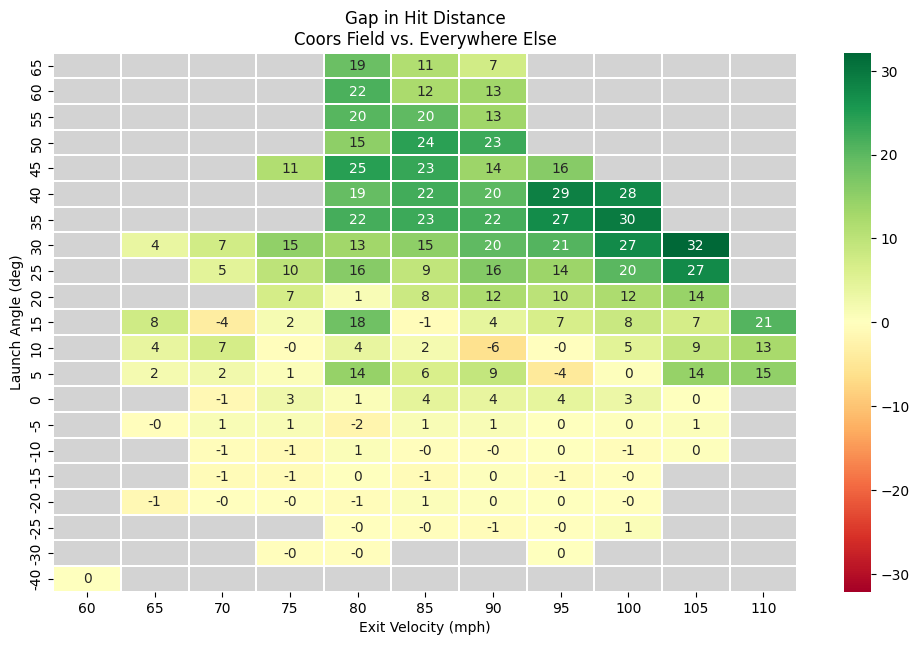

In [36]:
dist_gap_pivot = statcast[statcast['count_col'] >= min_count].pivot(index='la_bucket', columns='ev_bucket', values='distance_gap')
#gap_pivot[pd.isna(gap_pivot)] = 0.0
dist_gap_pivot = dist_gap_pivot.astype(float)

limit = max(list(dist_gap_pivot.max()) + list(dist_gap_pivot.min()), key=abs)
divnorm = colors.TwoSlopeNorm(vmin = -1 * limit, vcenter = 0, vmax = limit)

fig, ax = plt.subplots(figsize = (12, 7))
ax = sns.heatmap(dist_gap_pivot, cmap = 'RdYlGn', norm=divnorm, linewidths = 0.01, annot = True, fmt = ".0f")
ax.set_facecolor('lightgray')
ax.invert_yaxis()
ax.set_title('Gap in Hit Distance\nCoors Field vs. Everywhere Else')
ax.set_ylabel('Launch Angle (deg)')
ax.set_xlabel('Exit Velocity (mph)')
plt.show()

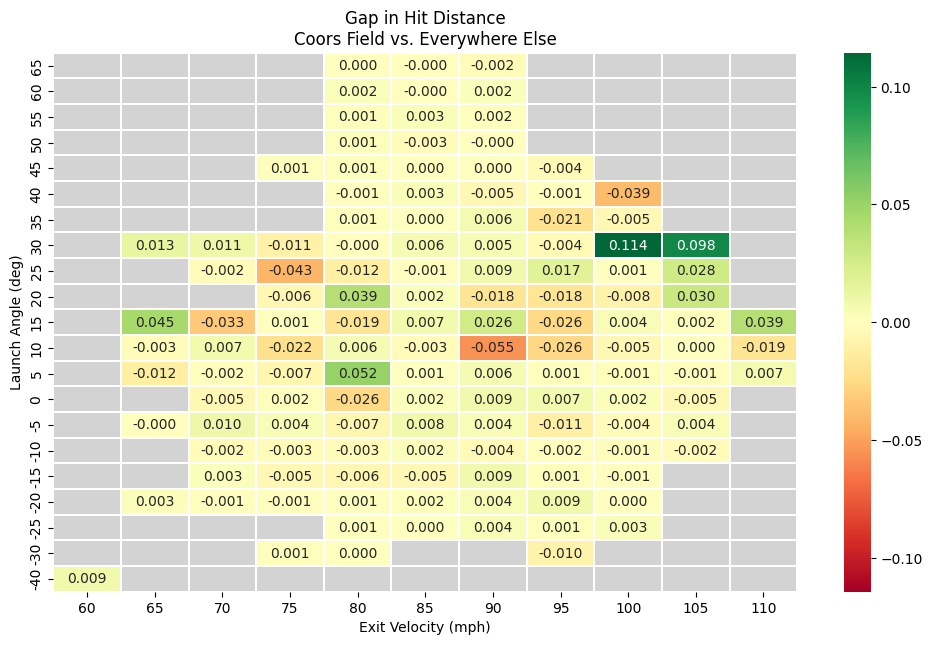

In [37]:
xwoba_gap_pivot = statcast[statcast['count_col'] >= min_count].pivot(index='la_bucket', columns='ev_bucket', values='xwoba_gap')
#gap_pivot[pd.isna(gap_pivot)] = 0.0
xwoba_gap_pivot = xwoba_gap_pivot.astype(float)

limit = max(list(xwoba_gap_pivot.max()) + list(xwoba_gap_pivot.min()), key=abs)
divnorm = colors.TwoSlopeNorm(vmin = -1 * limit, vcenter = 0, vmax = limit)

fig, ax = plt.subplots(figsize = (12, 7))
ax = sns.heatmap(xwoba_gap_pivot, cmap = 'RdYlGn', norm=divnorm, linewidths = 0.01, annot = True, fmt = ".3f")
ax.set_facecolor('lightgray')
ax.invert_yaxis()
ax.set_title('Gap in Hit Distance\nCoors Field vs. Everywhere Else')
ax.set_ylabel('Launch Angle (deg)')
ax.set_xlabel('Exit Velocity (mph)')
plt.show()

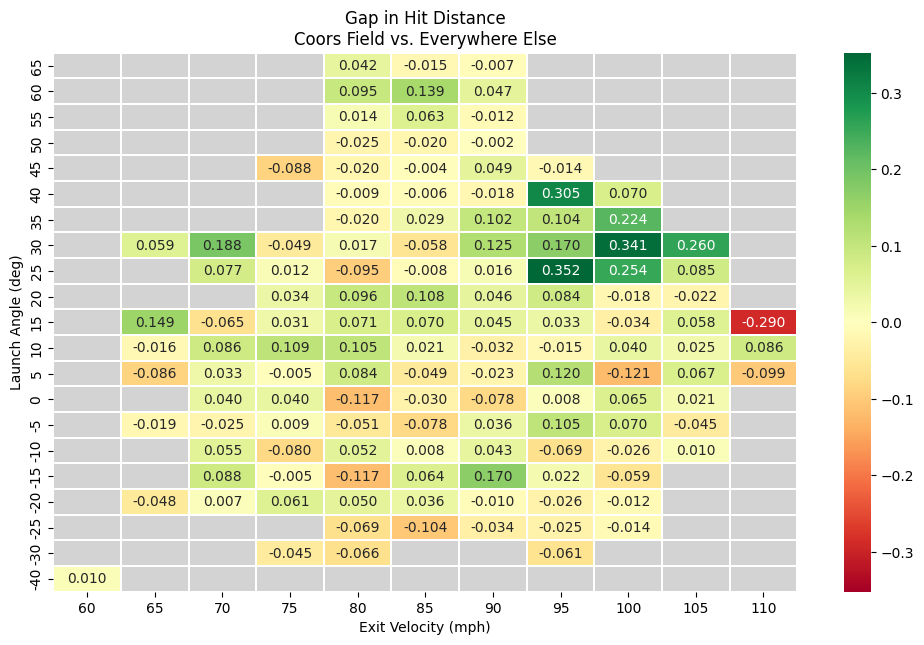

In [38]:
woba_gap_pivot = statcast[statcast['count_col'] >= min_count].pivot(index='la_bucket', columns='ev_bucket', values='woba_gap')
#gap_pivot[pd.isna(gap_pivot)] = 0.0
woba_gap_pivot = woba_gap_pivot.astype(float)

limit = max(list(woba_gap_pivot.max()) + list(woba_gap_pivot.min()), key=abs)
divnorm = colors.TwoSlopeNorm(vmin = -1 * limit, vcenter = 0, vmax = limit)

fig, ax = plt.subplots(figsize = (12, 7))
ax = sns.heatmap(woba_gap_pivot, cmap = 'RdYlGn', norm=divnorm, linewidths = 0.01, annot = True, fmt = ".3f")
ax.set_facecolor('lightgray')
ax.invert_yaxis()
ax.set_title('Gap in Hit Distance\nCoors Field vs. Everywhere Else')
ax.set_ylabel('Launch Angle (deg)')
ax.set_xlabel('Exit Velocity (mph)')
plt.show()

In [39]:
df['launch_speed_angle'].unique()

<IntegerArray>
[<NA>, 2, 4, 6, 3, 5, 1]
Length: 7, dtype: Int64

In [ ]:
mlb_df_ip['launch_speed_angle'].unique()

<IntegerArray>
[2, 4, 6, 3, 5, 1]
Length: 6, dtype: Int64

In [63]:
col_group_full = col_df_ip.groupby(['launch_speed_angle']).agg(
    ev_col=('launch_speed', 'mean'),
    la_col=('launch_angle', 'mean'),
    dist_col=('hit_distance_sc', 'mean'),
    count_col=('hit_distance_sc', 'count'),
    babip_col=('babip_value', 'mean'),
    bahb_col=('bahb_value', 'mean'),
    iso_col=('iso_value', 'mean'),
    woba_col=('woba_value', 'mean'),
    xwoba_col=('estimated_woba_using_speedangle', 'mean')
).reset_index()

mlb_group_full = mlb_df_ip.groupby(['launch_speed_angle']).agg(
    ev_mlb=('launch_speed', 'mean'),
    la_mlb=('launch_angle', 'mean'),
    dist_mlb=('hit_distance_sc', 'mean'),
    count_mlb=('hit_distance_sc', 'count'),
    babip_mlb=('babip_value', 'mean'),
    bahb_mlb=('bahb_value', 'mean'),
    iso_mlb=('iso_value', 'mean'),
    woba_mlb=('woba_value', 'mean'),
    xwoba_mlb=('estimated_woba_using_speedangle', 'mean')
).reset_index()


statcast = pd.merge(col_group_full, mlb_group_full, on=['launch_speed_angle'], how='inner')
statcast['ev_gap'] = statcast['ev_col'] - statcast['ev_mlb']
statcast['la_gap'] = statcast['la_col'] - statcast['la_mlb']
statcast['distance_gap'] = statcast['dist_col'] - statcast['dist_mlb']
statcast['distance_gap_perc'] = statcast['distance_gap'] / statcast['dist_mlb'] * 100
statcast['babip_gap'] = statcast['babip_col'] - statcast['babip_mlb']
statcast['bahb_gap'] = statcast['bahb_col'] - statcast['bahb_mlb']
statcast['iso_gap'] = statcast['iso_col'] - statcast['iso_mlb']
statcast['woba_gap'] = statcast['woba_col'] - statcast['woba_mlb']
statcast['xwoba_gap'] = statcast['xwoba_col'] - statcast['xwoba_mlb']
statcast['rel_count_col'] = statcast['count_col'] / sum(statcast['count_col'])
statcast['rel_count_mlb'] = statcast['count_mlb'] / sum(statcast['count_mlb'])

In [64]:
statcast

,launch_speed_angle,ev_col,la_col,dist_col,count_col,babip_col,bahb_col,iso_col,woba_col,xwoba_col,ev_mlb,la_mlb,dist_mlb,count_mlb,babip_mlb,bahb_mlb,iso_mlb,woba_mlb,xwoba_mlb,ev_gap,la_gap,distance_gap,distance_gap_perc,babip_gap,bahb_gap,iso_gap,woba_gap,xwoba_gap,rel_count_col,rel_count_mlb
0,1,49.516667,-15.461111,39.327778,180,0.2,0.2,0.011111,0.183889,0.167872,48.932248,-14.40571,37.717933,4974,0.19622,0.19622,0.007037,0.201136,0.169773,0.584419,-1.055401,1.609845,4.268114,0.00378,0.00378,0.004075,-0.017247,-0.001901,0.041667,0.041079
1,2,85.35696,-14.017045,20.705967,1391,0.191051,0.191051,0.012074,0.198544,0.167888,85.471853,-14.821452,20.078457,37562,0.17429,0.17429,0.017961,0.188676,0.168018,-0.114893,0.804407,0.62751,3.12529,0.016761,0.016761,-0.005887,0.009868,-0.00013,0.321991,0.310212
2,3,86.022309,45.001957,266.387735,1011,0.08317,0.097847,0.089041,0.120841,0.080993,85.976965,46.11533,245.566369,31822,0.051373,0.057712,0.046289,0.070747,0.074126,0.045344,-1.113373,20.821366,8.478916,0.031797,0.040135,0.042752,0.050095,0.006867,0.234028,0.262807
3,4,93.46426,11.214801,175.846432,1107,0.684116,0.684116,0.107401,0.65898,0.620571,93.315017,11.457312,174.63693,29537,0.661408,0.661442,0.114184,0.640504,0.62833,0.149243,-0.242511,1.209502,0.692581,0.022707,0.022673,-0.006783,0.018476,-0.007759,0.25625,0.243936
4,5,101.372509,23.054983,341.944828,290,0.429553,0.501718,0.553265,0.648797,0.558144,101.199436,23.6172,330.813221,7624,0.343078,0.417803,0.46526,0.543897,0.550874,0.173072,-0.562217,11.131606,3.364922,0.086475,0.083915,0.088005,0.1049,0.00727,0.06713,0.062964
5,6,104.693275,25.590643,399.105572,341,0.280702,0.777778,1.77193,1.347661,1.258196,104.715401,26.156416,382.477838,9566,0.227524,0.704605,1.652814,1.237329,1.258228,-0.022127,-0.565773,16.627734,4.347372,0.053177,0.073173,0.119116,0.110332,-0.000032,0.078935,0.079002


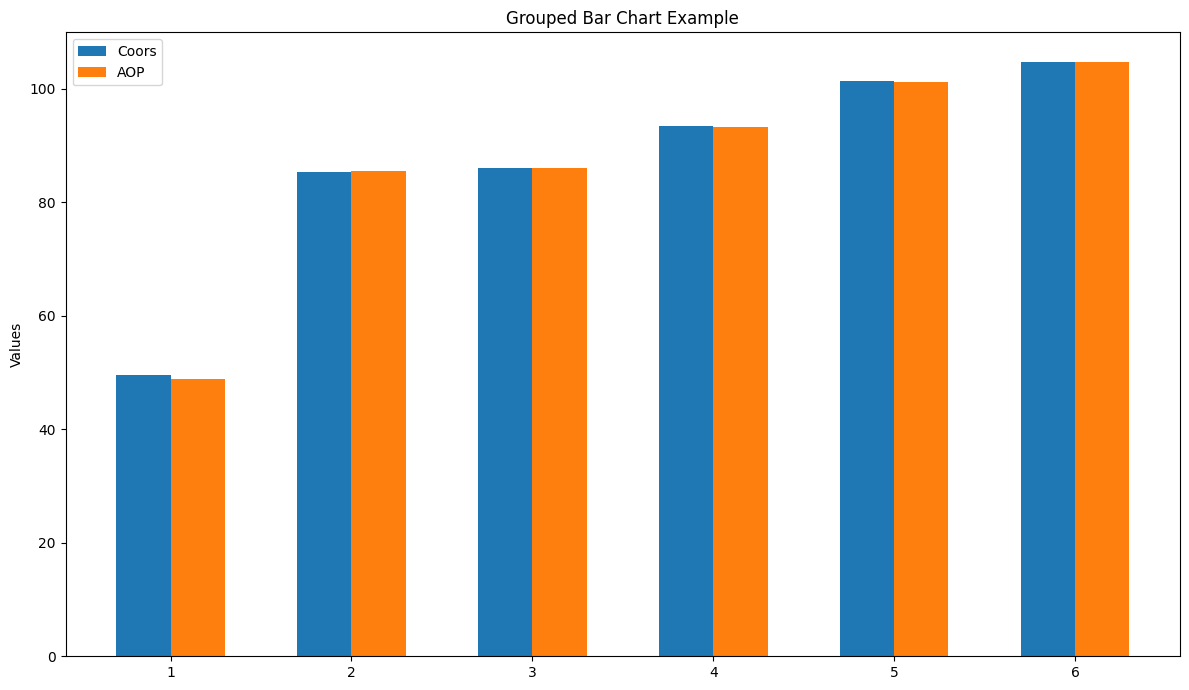

In [60]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['ev_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['ev_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

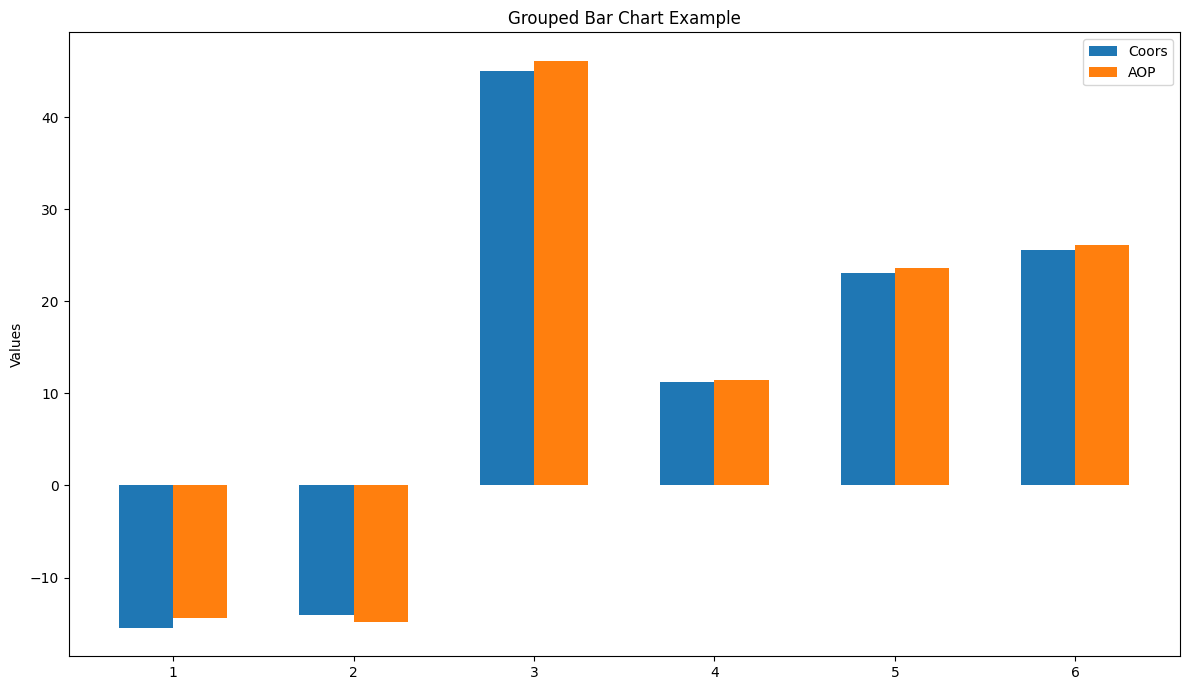

In [59]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['la_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['la_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

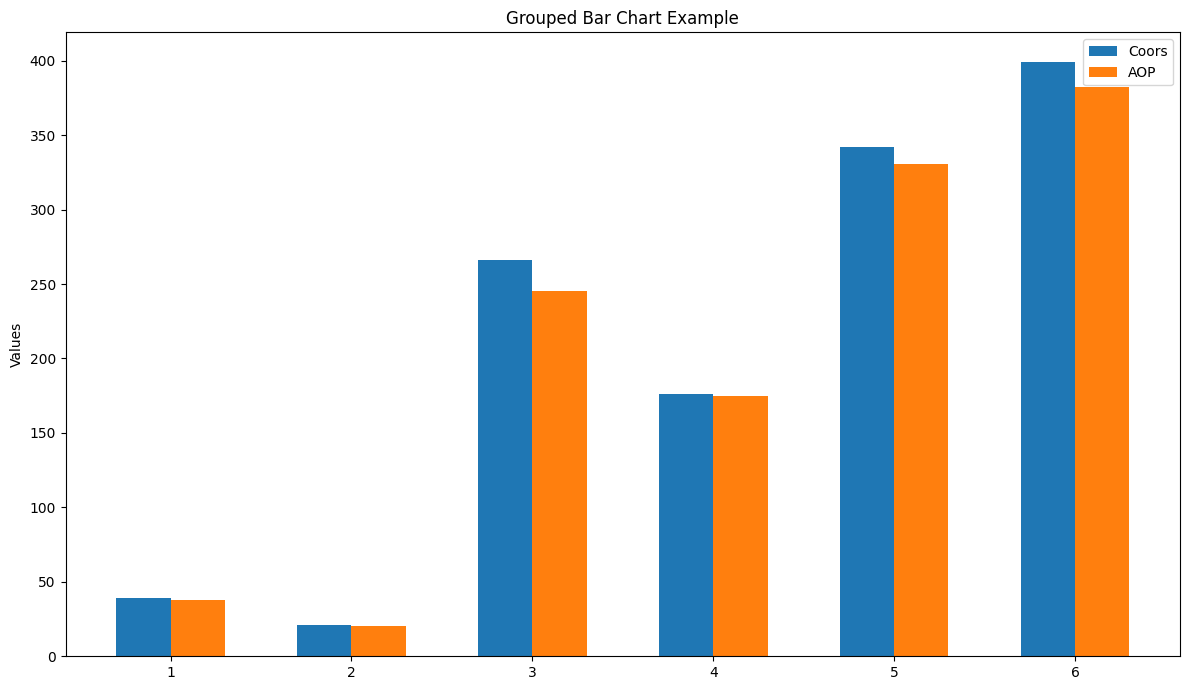

In [51]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['dist_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['dist_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

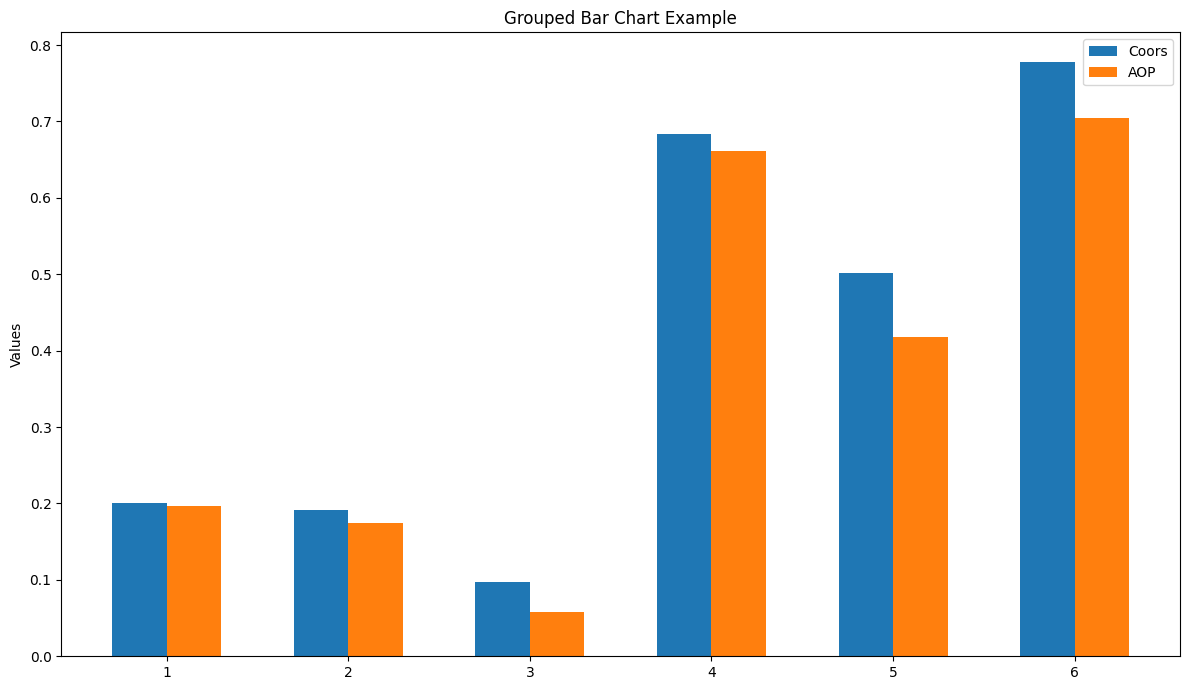

In [57]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['bahb_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['bahb_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

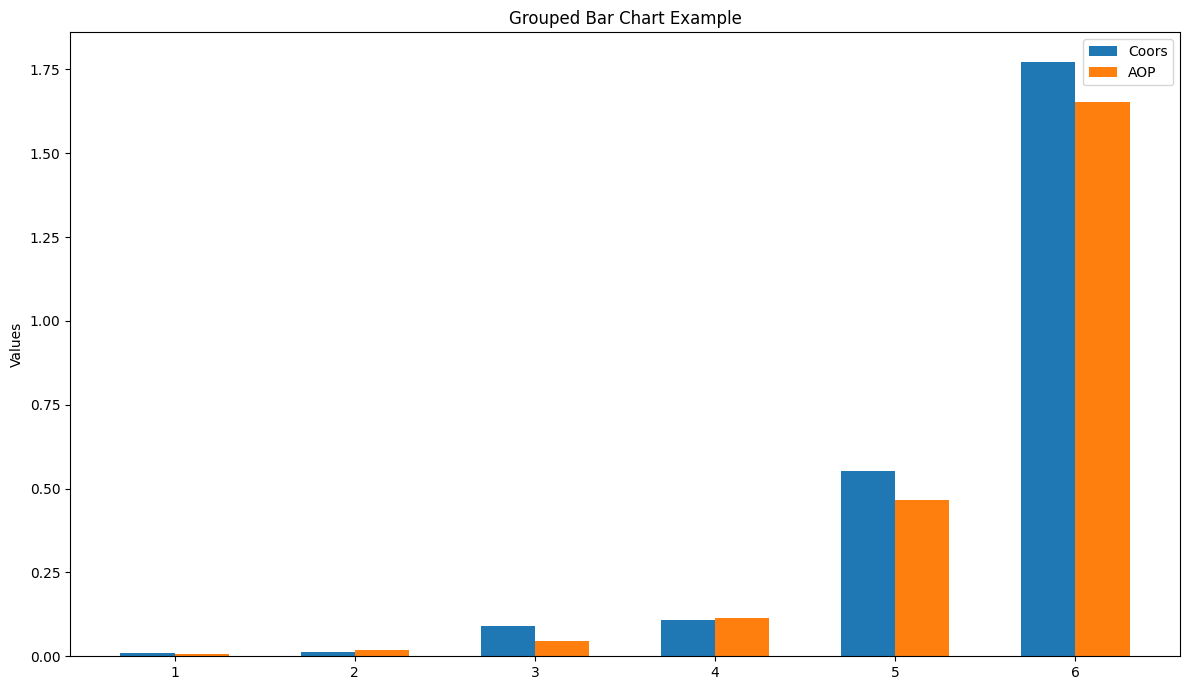

In [53]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['iso_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['iso_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

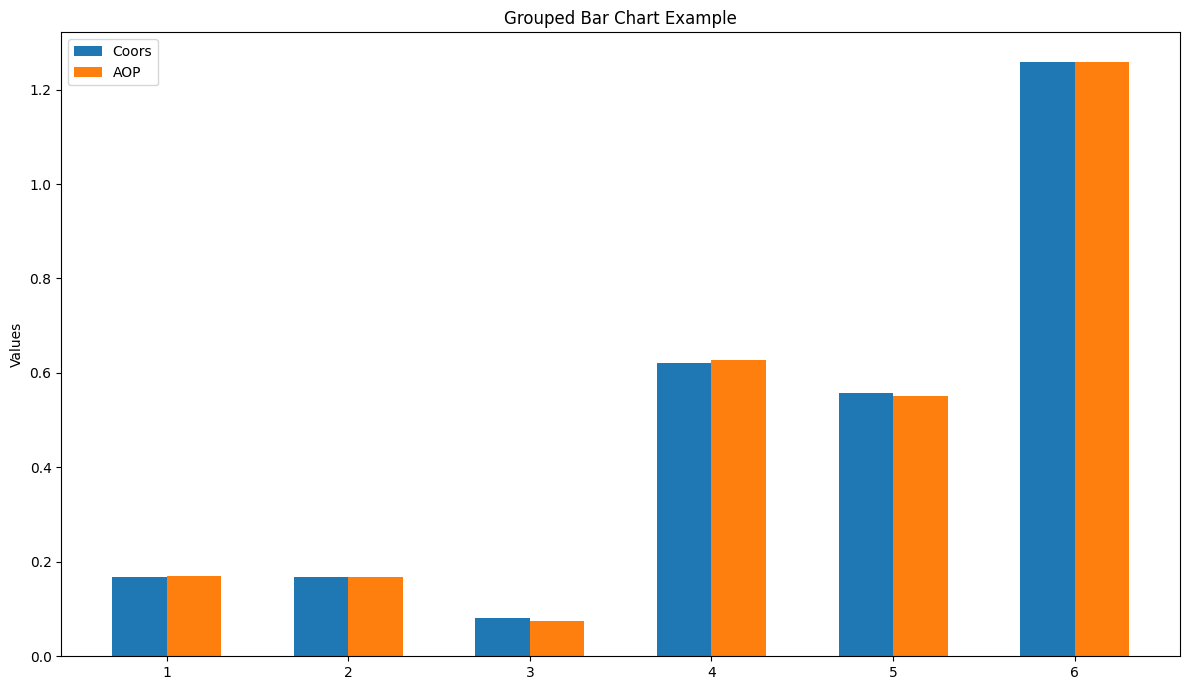

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['xwoba_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['xwoba_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

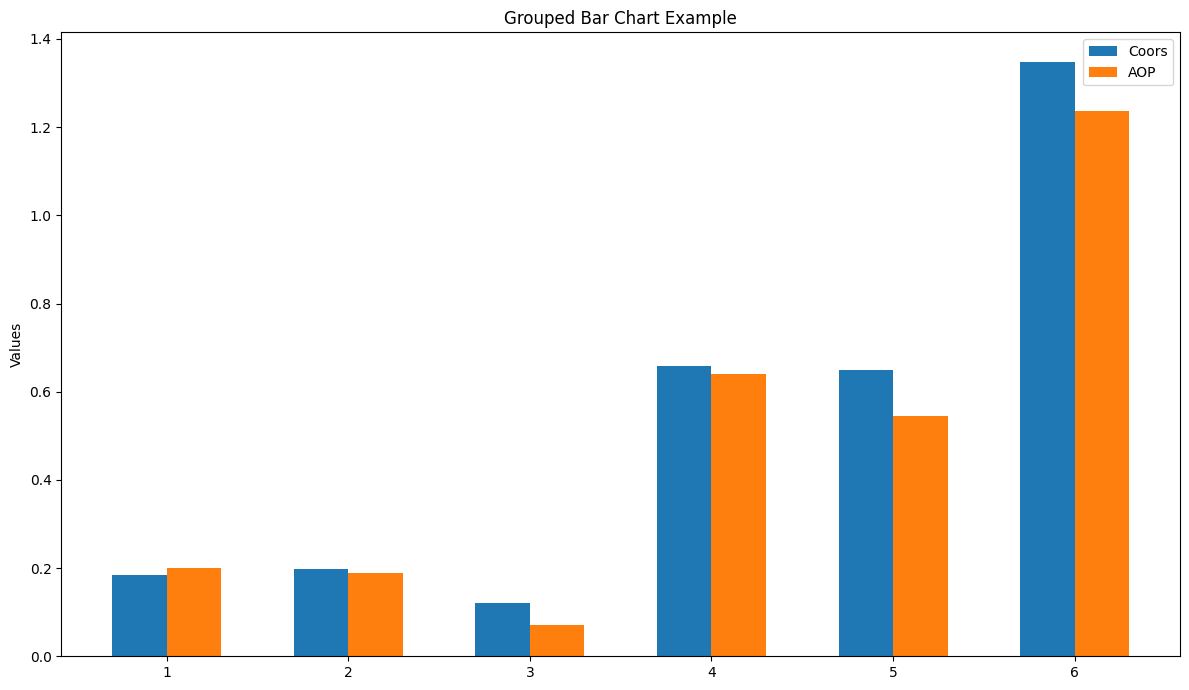

In [55]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['woba_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['woba_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

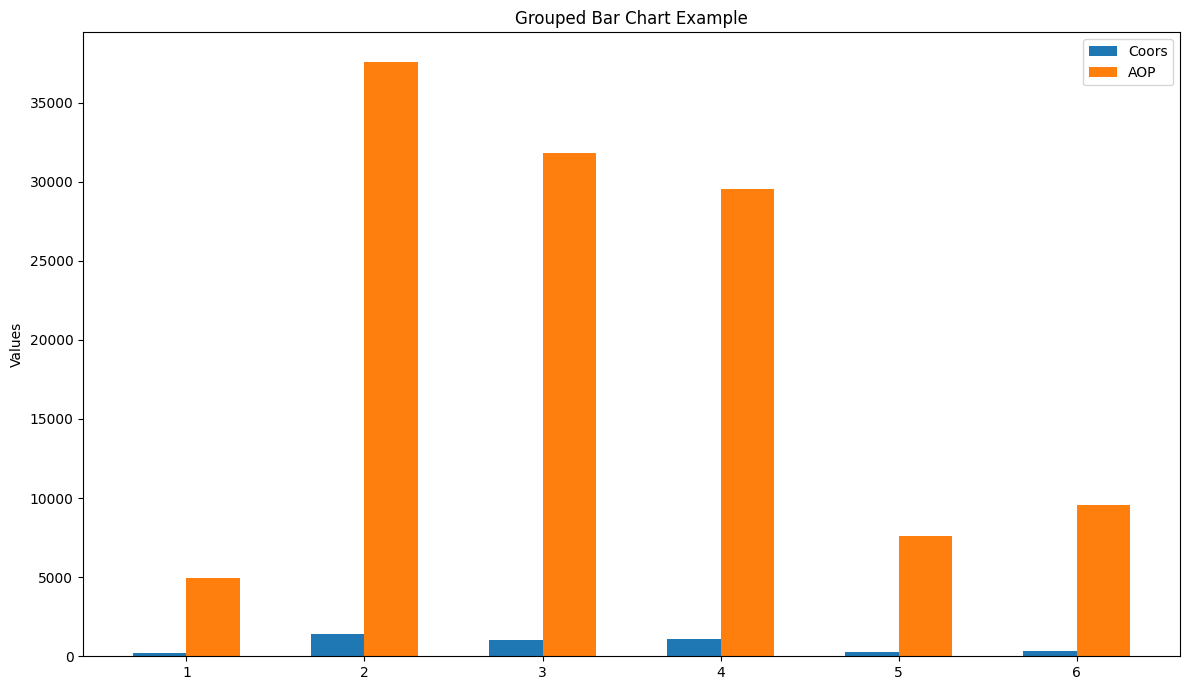

In [58]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['count_col'], 0.3, label='Coors')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['count_mlb'], 0.3, label='AOP')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()

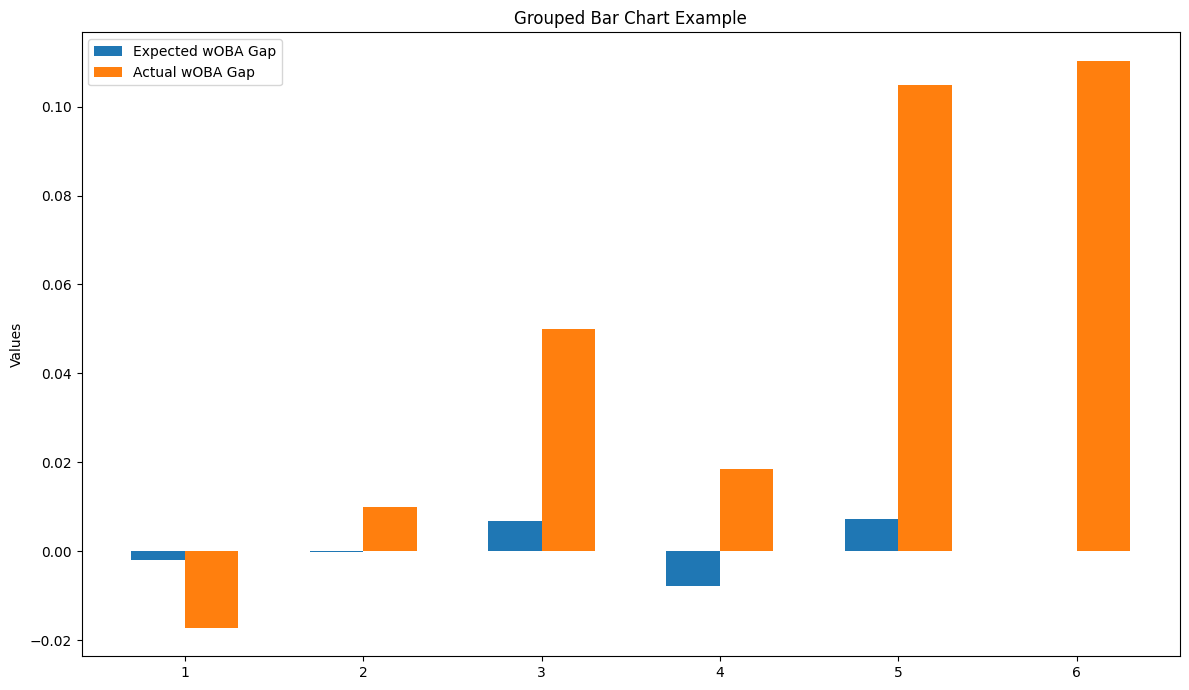

In [61]:
fig, ax = plt.subplots(figsize = (12, 7))
rects1 = ax.bar(statcast['launch_speed_angle'] - 0.15, statcast['xwoba_gap'], 0.3, label='Expected wOBA Gap')
rects2 = ax.bar(statcast['launch_speed_angle'] + 0.15, statcast['woba_gap'], 0.3, label='Actual wOBA Gap')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart Example')
#ax.set_xticks(x)
#ax.set_xticklabels(statcast['launch_speed_angle'])
ax.legend()

plt.tight_layout()
plt.show()